In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
# Create a dtype with the binary data format and the desired column names
dt = np.dtype([('sample', 'f4'),('x1', 'f4'), ('x2', 'f4'), ('x3', 'f4'), ('x4', 'f4')])
dataRx = np.fromfile("data/rx/data2.log", dtype=dt)
dataTx = np.fromfile("data/tx/data2.log", dtype=dt)

dfRx = pd.DataFrame(dataRx)
dfTx = pd.DataFrame(dataTx)

#dfRx = pd.DataFrame(dataRx, columns=["sample", "rx1", "rx2", "rx3", "rx4"])
#dfTx = pd.DataFrame(dataTx, columns=["sample", "tx1", "tx2", "tx3", "tx4"])

dfRx["sample"]=dfRx["sample"].astype(int) # convert to int
dfTx["sample"]=dfTx["sample"].astype(int) # convert to int


dfTx.head()

,sample,x1,x2,x3,x4
0,0,0.010727,0.612457,0.285507,0.260330
1,1,0.010712,0.612350,0.285568,0.260437
2,2,0.010788,0.612350,0.285538,0.260376
3,3,0.010818,0.612381,0.285370,0.260239
4,4,0.010773,0.612411,0.285461,0.260223


In [217]:
dt = np.dtype([('sample', 'f4'), ('msg', 'f4')])
syncDataRx= np.fromfile('data/rx/sync2.log', dtype=dt)
syncDataTx= np.fromfile('data/tx/sync2.log', dtype=dt)

syncRx = pd.DataFrame(syncDataRx,columns=data.dtype.names).astype(int)
syncTx = pd.DataFrame(syncDataTx,columns=data.dtype.names).astype(int)

syncRx.head()


,sample,msg
0,64780,0
1,70300,1
2,75820,2
3,81340,3
4,86860,4


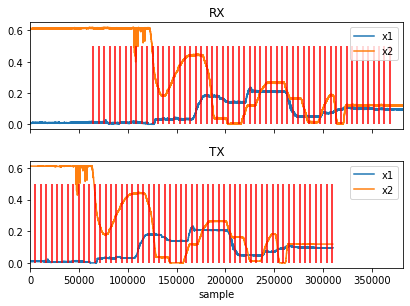

In [218]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout()


dfRx.plot(x="sample", y=["x1", "x2"], ax=ax[0], sharex=ax[0])
ax[0].set_title('RX')
ax[0].set_xlim([0,max([*dfRx["sample"],*dfTx["sample"]])])
ax[0].vlines(x=syncRx["sample"], ymin=0, ymax=0.5, colors='red')

dfTx.plot(x="sample", y=["x1", "x2"], ax=ax[1])
ax[1].set_title('TX')
ax[1].set_xlim([0,max([*dfRx["sample"],*dfTx["sample"]])])
ax[1].vlines(x=syncTx["sample"], ymin=0, ymax=0.5, colors='red')


plt.show()


In [219]:
def check_if_lost_messages(df):
    messages=df['msg'].tolist();
    sample=df['sample'].tolist();

    lost_messages_samples=[];
    for i in range (1,len(messages)):
        if messages[i] == 0:
            continue
        if messages[i] != messages[i-1]+1:
            lost_messages_samples.append[samples[i]]

    return lost_messages_samples

# check if received messages don't follow order from 0 to 7
# ie check if there's skipped messages
print("lost messages? ")
print(check_if_lost_messages(syncRx))

print("equal number of messages sent as received?")
print(len(syncRx['msg'])==len(syncTx['msg']))

lost messages? 
[]
equal number of messages sent as received?
True


In [220]:
# first message received in rx is the same as first message transmitted
diff = syncRx['sample'][0]-syncTx['sample'][0] # number of samples to take away from rx

diff

59268

In [224]:
#offset data and sync
dfRxCorrected=dfRx.iloc[diff:].copy()
dfRxCorrected['sample']=dfRxCorrected['sample']-diff # offset sample idx
syncRxCorrected=syncRx.copy()
syncRxCorrected['sample']=syncRxCorrected['sample']-diff
dfRxCorrected.head()

,sample,x1,x2,x3,x4
59268,0,0.013458,0.614273,0.336517,0.331375
59269,1,0.012787,0.613861,0.336182,0.330978
59270,2,0.012802,0.613602,0.335800,0.330353
59271,3,0.012131,0.613068,0.335617,0.330093
59272,4,0.012009,0.612137,0.334808,0.329590


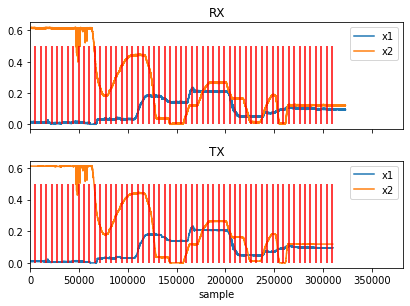

In [226]:
#plot again
fig, ax = plt.subplots(2, 1)
fig.tight_layout()


dfRxCorrected.plot(x="sample", y=["x1", "x2"], ax=ax[0], sharex=ax[0])
ax[0].set_title('RX')
ax[0].set_xlim([0,max([*dfRx["sample"],*dfTx["sample"]])])
ax[0].vlines(x=syncRxCorrected["sample"], ymin=0, ymax=0.5, colors='red')

dfTx.plot(x="sample", y=["x1", "x2"], ax=ax[1])
ax[1].set_title('TX')
ax[1].set_xlim([0,max([*dfRx["sample"],*dfTx["sample"]])])
ax[1].vlines(x=syncTx["sample"], ymin=0, ymax=0.5, colors='red')


plt.show()
